In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
import sympy

In [2]:
def f(x):
    return torch.tanh(torch.sin(x[:, 0] + x[:, 1]))
dataset = ku.create_dataset(f, n_var = 2, train_num = 100, test_num=20, ranges=[-3, 3])
dataset

{'train_input': tensor([[-0.0225,  1.1773],
         [ 1.6093,  0.1797],
         [-2.4691, -1.4638],
         [-2.2078,  1.4196],
         [-1.1555, -2.8777],
         [ 0.8045, -1.7781],
         [-0.0594, -0.7510],
         [ 2.3787, -1.4613],
         [-0.2662, -1.0495],
         [ 0.7938, -2.4589],
         [-0.9066, -0.6381],
         [-0.5897,  0.6413],
         [-2.8660, -1.9544],
         [-1.9868, -0.1540],
         [-1.2367,  2.1476],
         [ 0.1111, -0.3084],
         [ 1.1860,  0.0834],
         [ 1.8001, -0.2588],
         [-2.0338,  0.6071],
         [-1.3064,  1.9075],
         [ 1.0897,  2.8417],
         [ 2.4912,  1.9052],
         [-0.6174,  2.8482],
         [ 2.2449, -0.2170],
         [-0.4836, -2.6950],
         [ 0.3174, -1.4222],
         [ 2.7164,  2.0427],
         [-2.7830, -0.0194],
         [-1.8886, -1.4911],
         [-0.7595, -2.2989],
         [-1.1694, -2.8076],
         [ 2.5920, -2.5320],
         [-1.9445, -0.6085],
         [-1.3810,  1.6452],

In [3]:
dataset['train_input'].shape, dataset['train_label'].shape, dataset['test_input'].shape, dataset['test_label'].shape, 

(torch.Size([100, 2]),
 torch.Size([100, 1]),
 torch.Size([20, 2]),
 torch.Size([20, 1]))

checkpoint directory created: ./model
saving model version 0.0


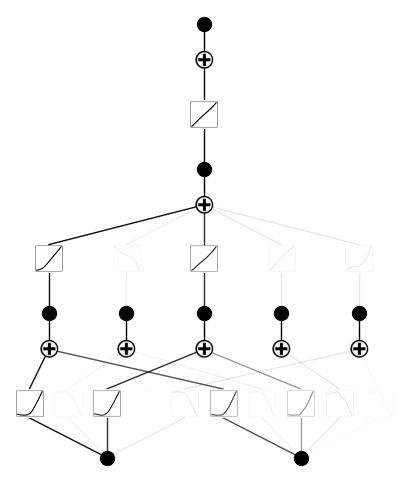

In [4]:
# model = kan.KAN(width = [2, 5, 1, 1])
# it appears sp_trainable and sb_trainable don't do anything
model = kan.KAN(width = [2, 5, 1, 1], affine_trainable=False);
model(dataset['train_input']);
model.plot()

In [5]:
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[0., 0., 0., 0.]]], requires_grad=True)

In [6]:
model.fix_symbolic(2, 0, 0, lambda x : torch.tanh(x));

saving model version 0.1


In [7]:
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], requires_grad=True)

In [8]:
vars(model.symbolic_fun[2])

{'training': True,
 '_parameters': OrderedDict([('mask', Parameter containing:
               tensor([[1.]])),
              ('affine', Parameter containing:
               tensor([[[1., 0., 1., 0.]]], requires_grad=True))]),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'out_dim': 1,
 'in_dim': 1,
 'funs': [[<function __main__.<lambda>(x)>]],
 'funs_avoid_singularity': [[<function __main__.<lambda>(x)>]],
 'funs_name': [['anonymous']],
 'funs_sympy': 

In [9]:
model.symbolic_fun[2].affine = torch.nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype = torch.float64, requires_grad=False), requires_grad=False)

In [10]:
model.fit(dataset, opt='LBFGS', steps=50, lamb=0.01);

| train_loss: 4.87e-02 | test_loss: 8.16e-02 | reg: 4.06e+00 | : 100%|█| 50/50 [00:08<00:00,  5.79it

saving model version 0.2


In [11]:
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], dtype=torch.float64)

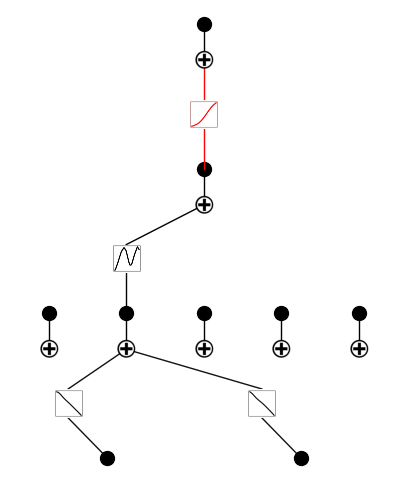

In [12]:
model.plot()

saving model version 0.3


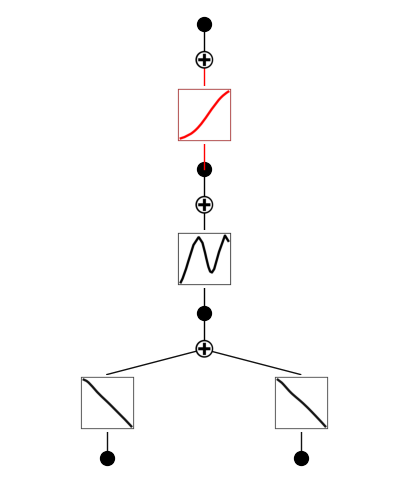

In [13]:
model = model.prune()
model.plot()

In [14]:
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], dtype=torch.float64, requires_grad=True)

In [15]:
model.symbolic_fun[2].affine = nn.Parameter(model.symbolic_fun[2].affine.data, requires_grad=False)
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], dtype=torch.float64)

In [16]:
model.suggest_symbolic(1, 0, 0);

  function  fitting r2   r2 loss  complexity  complexity loss  total loss
0        0    0.000000  0.000014           0                0    0.000003
1      sin    0.951465 -4.364546           2                2    0.727091
2      cos    0.951465 -4.364543           2                2    0.727091
3        x    0.203089 -0.327491           1                1    0.734502
4    1/x^2    0.306816 -0.528669           2                2    1.494266


In [17]:
model.fix_symbolic(0, 0, 0, 'x');
model.fix_symbolic(0, 1, 0, 'x');
model.fix_symbolic(1, 0, 0, 'sin');

r2 is 0.9992256760597229
saving model version 0.4
r2 is 0.9988035559654236
saving model version 0.5
r2 is 0.9514654278755188
saving model version 0.6


In [18]:
model.fit(dataset, opt = 'LBFGS', steps=50);

| train_loss: 1.08e-07 | test_loss: 1.23e-07 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 25.31it

saving model version 0.7


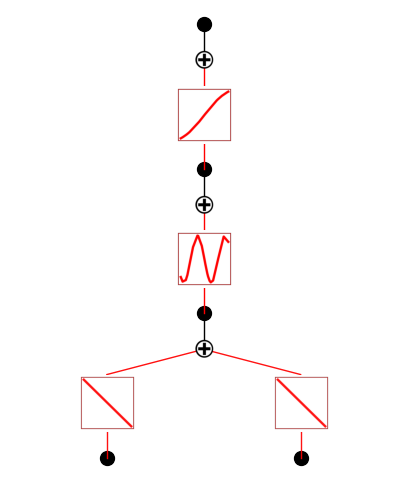

In [19]:
model.plot()

In [20]:
len(model.symbolic_fun)

3

In [21]:
model.symbolic_fun[2].affine[0, 0]

tensor([1., 0., 1., 0.], dtype=torch.float64)

In [22]:
model.subnode_scale

[Parameter containing:
 tensor([1.]),
 Parameter containing:
 tensor([1.]),
 Parameter containing:
 tensor([1.])]

In [23]:
model.subnode_bias

[Parameter containing:
 tensor([0.]),
 Parameter containing:
 tensor([0.]),
 Parameter containing:
 tensor([0.])]

In [24]:
model.symbolic_fun[0].affine

Parameter containing:
tensor([[[-4.9245, -5.9911,  0.0497,  0.1454],
         [-5.3607, -9.9997,  0.0456,  0.3037]]], requires_grad=True)

In [25]:
def symbolic_formula(self, var=None, normalizer=None, output_normalizer = None):
    '''
    get symbolic formula

    Args:
    -----
        var : None or a list of sympy expression
            input variables
        normalizer : [mean, std]
        output_normalizer : [mean, std]
        
    Returns:
    --------
        None

    Example
    -------
    >>> from kan import *
    >>> model = KAN(width=[2,1,1], grid=5, k=3, noise_scale=0.0, seed=0)
    >>> f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]])+x[:,[1]]**2)
    >>> dataset = create_dataset(f, n_var=3)
    >>> model.fit(dataset, opt='LBFGS', steps=20, lamb=0.001);
    >>> model.auto_symbolic()
    >>> model.symbolic_formula()[0][0]
    '''
    
    symbolic_acts = []
    symbolic_acts_premult = []
    x = []

    def ex_round(ex1, n_digit):
        ex2 = ex1
        for a in sympy.preorder_traversal(ex1):
            if isinstance(a, sympy.Float):
                ex2 = ex2.subs(a, round(a, n_digit))
        return ex2

    # define variables
    if var == None:
        for ii in range(1, self.width[0][0] + 1):
            exec(f"x{ii} = sympy.Symbol('x_{ii}')")
            exec(f"x.append(x{ii})")
    elif isinstance(var[0], sympy.Expr):
        x = var
    else:
        x = [sympy.symbols(var_) for var_ in var]

    x0 = x

    if normalizer != None:
        mean = normalizer[0]
        std = normalizer[1]
        x = [(x[i] - mean[i]) / std[i] for i in range(len(x))]

    symbolic_acts.append(x)

    for l in range(len(self.width_in) - 1):
        num_sum = self.width[l + 1][0]
        num_mult = self.width[l + 1][1]
        y = []
        for j in range(self.width_out[l + 1]):
            yj = 0.
            for i in range(self.width_in[l]):
                a, b, c, d = self.symbolic_fun[l].affine[j, i]
                sympy_fun = self.symbolic_fun[l].funs_sympy[j][i]
                try:
                    yj += c * sympy_fun(a * x[i] + b) + d
                except:
                    print('vars', a, b, c, d)
                    yj += c * sympy.tanh(a * x[i] + b) + d
                    print('make sure all activations need to be converted to symbolic formulas first!')
                    # return
            yj = self.subnode_scale[l][j] * yj + self.subnode_bias[l][j]
            y.append(yj)
                
        symbolic_acts_premult.append(y)
        
        print(l, y)

        mult = []
        for k in range(num_mult):
            if isinstance(self.mult_arity, int):
                mult_arity = self.mult_arity
            else:
                mult_arity = self.mult_arity[l+1][k]
            for i in range(mult_arity-1):
                if i == 0:
                    mult_k = y[num_sum+2*k] * y[num_sum+2*k+1]
                else:
                    mult_k = mult_k * y[num_sum+2*k+i+1]
            mult.append(mult_k)
            
        y = y[:num_sum] + mult
        
        for j in range(self.width_in[l+1]):
            y[j] = self.node_scale[l][j] * y[j] + self.node_bias[l][j]
        
        x = y
        symbolic_acts.append(x)

    print(symbolic_acts)
    if output_normalizer != None:
        print('here')
        output_layer = symbolic_acts[-1]
        means = output_normalizer[0]
        stds = output_normalizer[1]

        assert len(output_layer) == len(means), 'output_normalizer does not match the output layer'
        assert len(output_layer) == len(stds), 'output_normalizer does not match the output layer'
        
        output_layer = [(output_layer[i] * stds[i] + means[i]) for i in range(len(output_layer))]
        symbolic_acts[-1] = output_layer


    self.symbolic_acts = [[symbolic_acts[l][i] for i in range(len(symbolic_acts[l]))] for l in range(len(symbolic_acts))]
    self.symbolic_acts_premult = [[symbolic_acts_premult[l][i] for i in range(len(symbolic_acts_premult[l]))] for l in range(len(symbolic_acts_premult))]

    out_dim = len(symbolic_acts[-1])
    #return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0
    return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0

In [26]:
ku.ex_round(symbolic_formula(model)[0][0], 4)

0 [-0.244594923277367*x_1 - 0.244594917417327*x_2 - 0.304801958620171]
1 [1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8]
vars tensor(1., dtype=torch.float64) tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0., dtype=torch.float64)
make sure all activations need to be converted to symbolic formulas first!
2 [1.0*tanh(1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8)]
[[x_1, x_2], [-0.244594923277367*x_1 - 0.244594917417327*x_2 - 0.304801958620171], [1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8], [1.0*tanh(1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8)]]


1.0*tanh(1.0*sin(1.0*x_1 + 1.0*x_2))

In [27]:
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], dtype=torch.float64)

In [28]:
model.symbolic_fun[2].affine = torch.nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype = torch.float64, requires_grad=False), requires_grad=False)
model.symbolic_fun[2].affine

Parameter containing:
tensor([[[1., 0., 1., 0.]]], dtype=torch.float64)

In [29]:
ku.ex_round(symbolic_formula(model)[0][0], 4)

0 [-0.244594923277367*x_1 - 0.244594917417327*x_2 - 0.304801958620171]
1 [1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8]
vars tensor(1., dtype=torch.float64) tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64) tensor(0., dtype=torch.float64)
make sure all activations need to be converted to symbolic formulas first!
2 [1.0*tanh(1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8)]
[[x_1, x_2], [-0.244594923277367*x_1 - 0.244594917417327*x_2 - 0.304801958620171], [1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8], [1.0*tanh(1.00000011920929*sin(0.999999990597571*x_1 + 0.999999966639431*x_2 - 4.90330815949847e-8) - 3.31378622320244e-8)]]


1.0*tanh(1.0*sin(1.0*x_1 + 1.0*x_2))